In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
from statsmodels.stats.multitest import multipletests

In [2]:
csv_file_path = 'data/data_all_cleaned.csv'
data_raw = pd.read_csv(csv_file_path)

data = data_raw.copy()

print('Cantidad de participantes: ', len(data))
data.head()

Cantidad de participantes:  604


,ext1,ext2,ext3,ext4,ext5,ext6,ext7,ext8,ext9,ext10,...,opn10,degree_category,degree,happiness_level,gender,birth_date,birth_location_country,birth_location_country_clean,birth_location_province,birth_location_city
0,4,1,4,2,4,2,4,2,4,2,...,5,Business,Negocios Digitales,4,M,1998/08/15,Argentina,Argentina,Buenos Aires,San Isidro
1,4,1,3,2,5,1,3,3,2,4,...,5,STEM,Física,4,M,1997/04/14,Argentina,Argentina,CABA,Recoleta
2,4,3,4,2,4,2,4,2,2,4,...,3,Social Sciences,Dret,3,F,2000/01/28,Catalunya,Spain,Barcelona,Barcelona
3,2,3,4,3,3,4,4,3,3,3,...,4,Education,Psicopedagogia,3,F,1967/01/04,Argentina,Argentina,Ciudad de Buenos Aires,Ciudad de Buenos Aires
4,3,4,2,3,5,1,5,4,1,5,...,5,NaN,Ninguna,3,M,1995/02/24,Argentina,Argentina,Buenos aires,San isidro


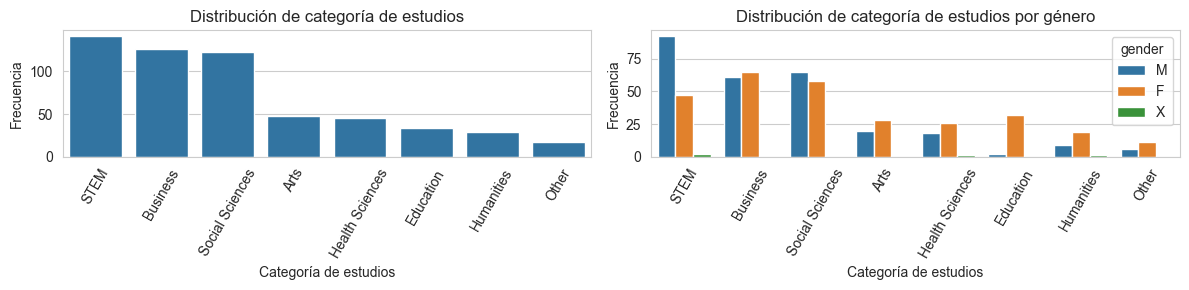

In [3]:
sns.set_style("whitegrid")

# Gráfico 1.1: Distribución de categoría de estudios
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='degree_category', order=data['degree_category'].value_counts().index)
plt.title('Distribución de categoría de estudios')
plt.xlabel('Categoría de estudios')
plt.ylabel('Frecuencia')
plt.xticks(rotation=60)

# Gráfico 1.2: Distribución de categoría de estudios por género
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='degree_category', hue='gender', order=data['degree_category'].value_counts().index)
plt.title('Distribución de categoría de estudios por género')
plt.xlabel('Categoría de estudios')
plt.ylabel('Frecuencia')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

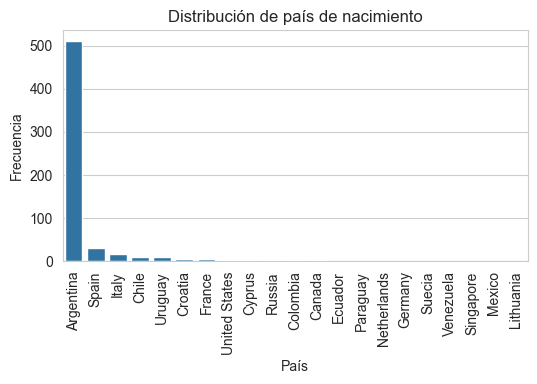

In [4]:
# Gráfico 2: Distribución de país de nacimiento
plt.figure(figsize=(6, 3))
sns.countplot(data=data, x='birth_location_country_clean', order=data['birth_location_country_clean'].value_counts().index)
plt.title('Distribución de país de nacimiento')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

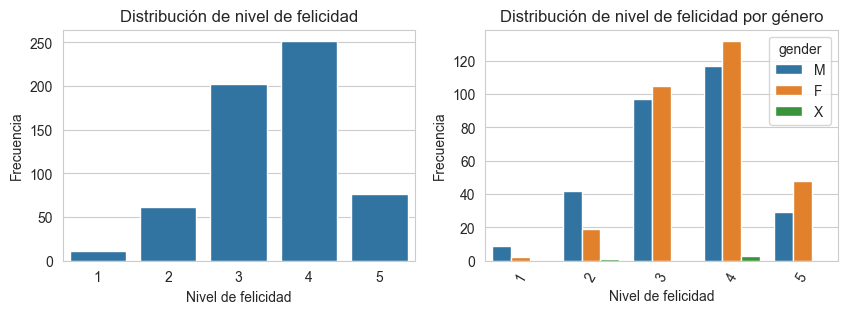

In [5]:
# Gráfico 3.1: Distribución de nivel de felicidad al momento del test
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='happiness_level')
plt.title('Distribución de nivel de felicidad')
plt.xlabel('Nivel de felicidad')
plt.ylabel('Frecuencia')

# Gráfico 3.2: Distribución de nivel de felicidad al momento del test por género
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='happiness_level', hue='gender')
plt.title('Distribución de nivel de felicidad por género')
plt.xlabel('Nivel de felicidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=60)

plt.show()

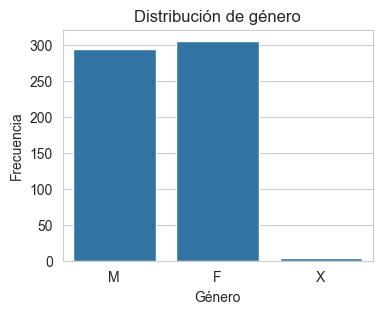

In [6]:
# Gráfico 4: Distribución de género
plt.figure(figsize=(4, 3))
sns.countplot(data=data, x='gender')
plt.title('Distribución de género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

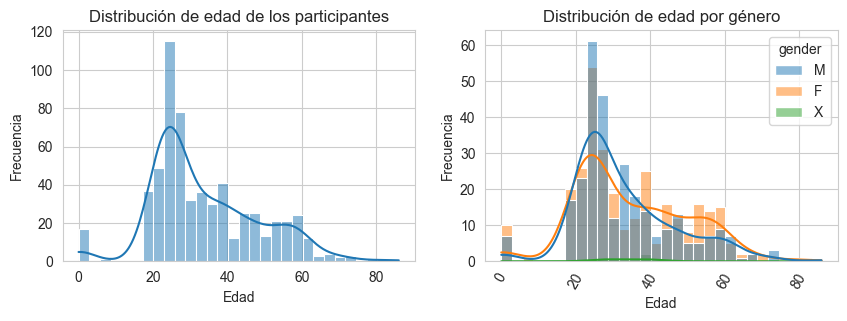

In [7]:
current_year = datetime.now().year
data['birth_date'] = pd.to_datetime(data['birth_date'], format='%Y/%m/%d')
data['age'] = current_year - data['birth_date'].dt.year

# Gráfico 5.1: Distribución de edad
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribución de edad de los participantes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Gráfico 5.2: Distribución de edad por género
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='age', hue='gender', bins=30, kde=True)
plt.title('Distribución de edad por género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=60)

plt.show()

In [8]:
columns_to_reencode = ['ext2', 'ext4', 'ext6', 'ext8', 'ext10',
                       'est2', 'est4',
                       'agr1', 'agr3', 'agr5', 'agr7',
                       'csn2', 'csn4', 'csn6', 'csn8', 
                       'opn2', 'opn4', 'opn6']

data[columns_to_reencode] = 6 - data[columns_to_reencode]

# make columns 0-49 astype(float)
data.iloc[:, 0:50] = data.iloc[:, 0:50].astype(float)

data.head()

,ext1,ext2,ext3,ext4,ext5,ext6,ext7,ext8,ext9,ext10,...,degree_category,degree,happiness_level,gender,birth_date,birth_location_country,birth_location_country_clean,birth_location_province,birth_location_city,age
0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,Business,Negocios Digitales,4,M,1998-08-15,Argentina,Argentina,Buenos Aires,San Isidro,25
1,4.0,5.0,3.0,4.0,5.0,5.0,3.0,3.0,2.0,2.0,...,STEM,Física,4,M,1997-04-14,Argentina,Argentina,CABA,Recoleta,26
2,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,...,Social Sciences,Dret,3,F,2000-01-28,Catalunya,Spain,Barcelona,Barcelona,23
3,2.0,3.0,4.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,...,Education,Psicopedagogia,3,F,1967-01-04,Argentina,Argentina,Ciudad de Buenos Aires,Ciudad de Buenos Aires,56
4,3.0,2.0,2.0,3.0,5.0,5.0,5.0,2.0,1.0,1.0,...,NaN,Ninguna,3,M,1995-02-24,Argentina,Argentina,Buenos aires,San isidro,28


In [9]:
openness_columns = ['opn1', 'opn2', 'opn3', 'opn4', 'opn5', 'opn6', 'opn7', 'opn8', 'opn9', 'opn10']
conscientiousness_columns = ['csn1', 'csn2', 'csn3', 'csn4', 'csn5', 'csn6', 'csn7', 'csn8', 'csn9', 'csn10']
extraversion_columns = ['ext1', 'ext2', 'ext3', 'ext4', 'ext5', 'ext6', 'ext7', 'ext8', 'ext9', 'ext10']
agreeableness_columns = ['agr1', 'agr2', 'agr3', 'agr4', 'agr5', 'agr6', 'agr7', 'agr8', 'agr9', 'agr10']
neuroticism_columns = ['est1', 'est2', 'est3', 'est4', 'est5', 'est6', 'est7', 'est8', 'est9', 'est10']

data['openness_score'] = data[openness_columns].sum(axis=1)
data['conscientiousness_score'] = data[conscientiousness_columns].sum(axis=1)
data['extraversion_score'] = data[extraversion_columns].sum(axis=1)
data['agreeableness_score'] = data[agreeableness_columns].sum(axis=1)
data['neuroticism_score'] = data[neuroticism_columns].sum(axis=1)

/var/folders/kx/qk1cp_r506x35p9lld01jtd00000gn/T/ipykernel_95648/2900695858.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ocean_by_age = data.groupby('age_group')[['openness_score', 'conscientiousness_score', 'extraversion_score', 'agreeableness_score', 'neuroticism_score']].mean()


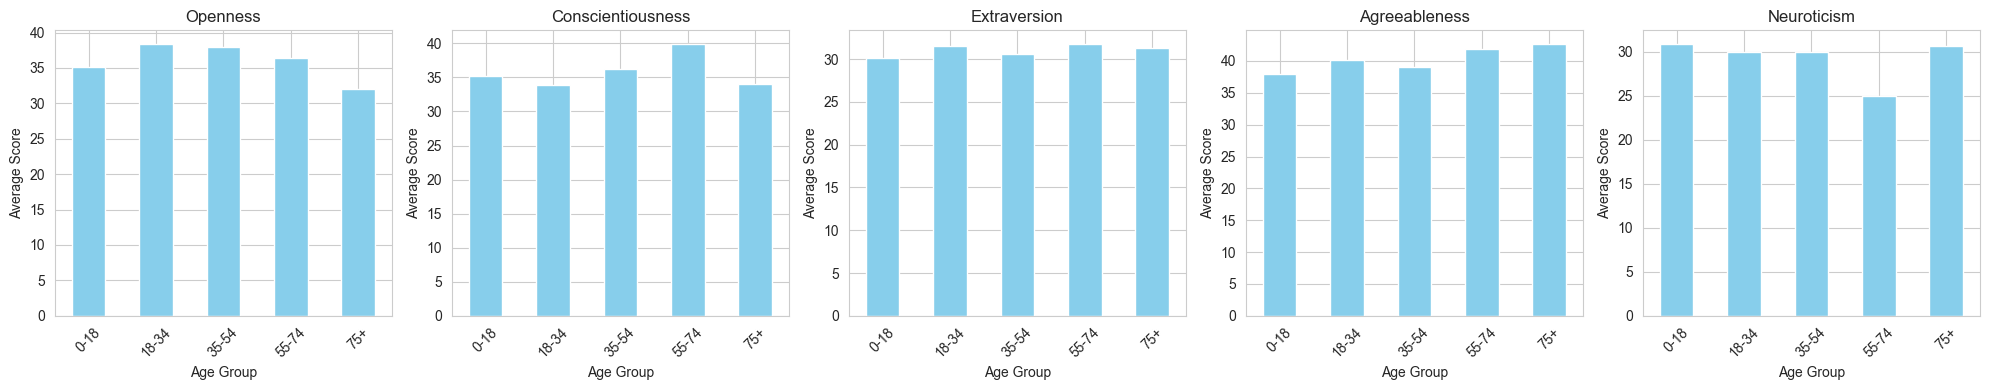

In [10]:
# Creamos una nueva columna 'age_group' para agrupar las edades en rangos
bins = [0, 18, 35, 55, 75, 105]
labels = ['0-18','18-34', '35-54', '55-74', '75+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Calculamos el promedio de cada OCEAN trait por grupo de edad
mean_ocean_by_age = data.groupby('age_group')[['openness_score', 'conscientiousness_score', 'extraversion_score', 'agreeableness_score', 'neuroticism_score']].mean()

traits = ['openness_score', 'conscientiousness_score', 'extraversion_score', 'agreeableness_score', 'neuroticism_score']
trait_names = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']

# Gráfico 6: Promedio de cada OCEAN trait por grupo de edad
plt.figure(figsize=(20, 4))

for i, trait in enumerate(traits):
    plt.subplot(1, 5, i+1)
    mean_ocean_by_age[trait].plot(kind='bar', color='skyblue')
    plt.title(trait_names[i])
    plt.xlabel('Age Group')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [28]:
# Groups and Questions
ext_questions = {'ext1' : 'I am the life of the party',
                 'ext2' : 'I dont talk a lot',
                 'ext3' : 'I feel comfortable around people',
                 'ext4' : 'I keep in the background',
                 'ext5' : 'I start conversations',
                 'ext6' : 'I have little to say',
                 'ext7' : 'I talk to a lot of different people at parties',
                 'ext8' : 'I dont like to draw attention to myself',
                 'ext9' : 'I dont mind being the center of attention',
                 'ext10': 'I am quiet around strangers'}

est_questions = {'est1' : 'I get stressed out easily',
                 'est2' : 'I am relaxed most of the time',
                 'est3' : 'I worry about things',
                 'est4' : 'I seldom feel blue',
                 'est5' : 'I am easily disturbed',
                 'est6' : 'I get upset easily',
                 'est7' : 'I change my mood a lot',
                 'est8' : 'I have frequent mood swings',
                 'est9' : 'I get irritated easily',
                 'est10': 'I often feel blue'}

agr_questions = {'agr1' : 'I feel little concern for others',
                 'agr2' : 'I am interested in people',
                 'agr3' : 'I insult people',
                 'agr4' : 'I sympathize with others feelings',
                 'agr5' : 'I am not interested in other peoples problems',
                 'agr6' : 'I have a soft heart',
                 'agr7' : 'I am not really interested in others',
                 'agr8' : 'I take time out for others',
                 'agr9' : 'I feel others emotions',
                 'agr10': 'I make people feel at ease'}

csn_questions = {'csn1' : 'I am always prepared',
                 'csn2' : 'I leave my belongings around',
                 'csn3' : 'I pay attention to details',
                 'csn4' : 'I make a mess of things',
                 'csn5' : 'I get chores done right away',
                 'csn6' : 'I often forget to put things back in their proper place',
                 'csn7' : 'I like order',
                 'csn8' : 'I shirk my duties',
                 'csn9' : 'I follow a schedule',
                 'csn10' : 'I am exacting in my work'}

opn_questions = {'opn1' : 'I have a rich vocabulary',
                 'opn2' : 'I have difficulty understanding abstract ideas',
                 'opn3' : 'I have a vivid imagination',
                 'opn4' : 'I am not interested in abstract ideas',
                 'opn5' : 'I have excellent ideas',
                 'opn6' : 'I do not have a good imagination',
                 'opn7' : 'I am quick to understand things',
                 'opn8' : 'I use difficult words',
                 'opn9' : 'I spend time reflecting on things',
                 'opn10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('ext')]
EST = [column for column in data if column.startswith('est')]
AGR = [column for column in data if column.startswith('agr')]
CSN = [column for column in data if column.startswith('csn')]
OPN = [column for column in data if column.startswith('opn')]

In [80]:
# Función para visualizar las respuestas de cada rasgo de personalidad
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=5, color= color, alpha=.5)
        plt.xticks(range(1,6))
        plt.title(questions[groupname[i-1]], fontsize=18)


Q&As Related to Extroversion Personality


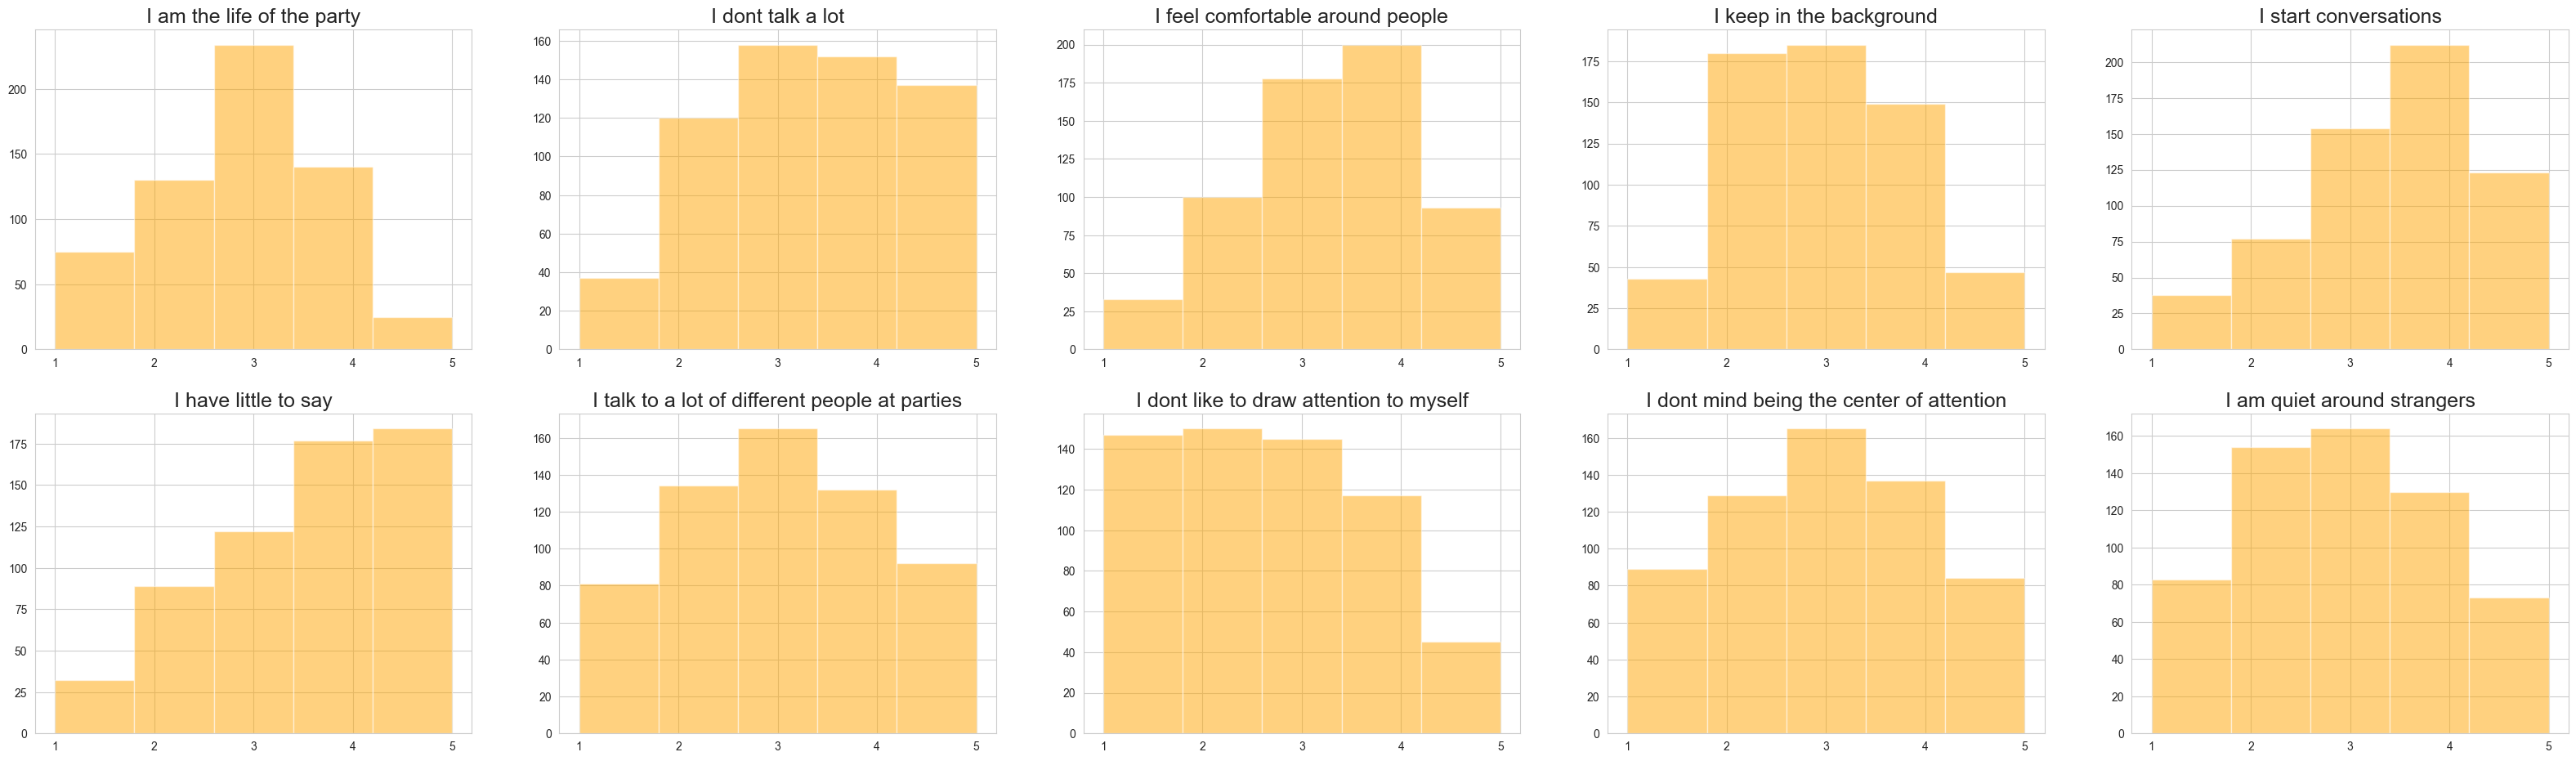

In [81]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


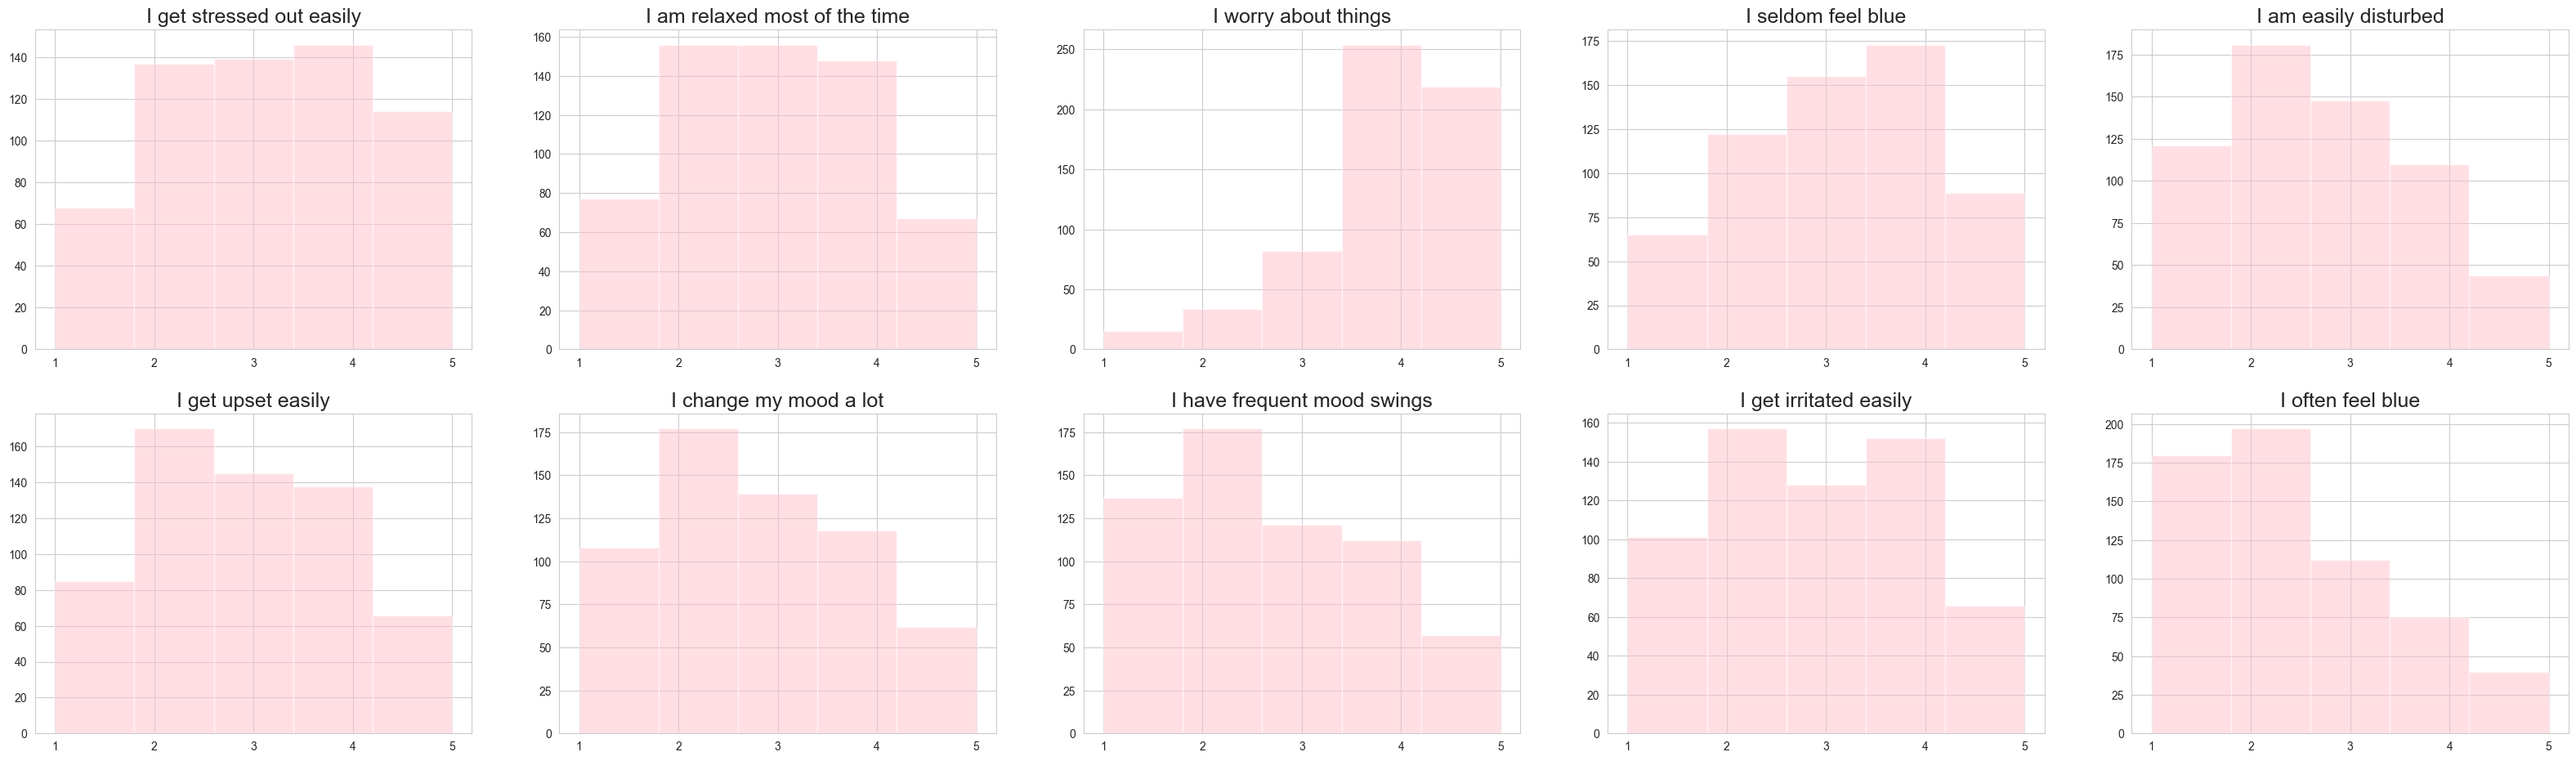

In [82]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeableness Personality


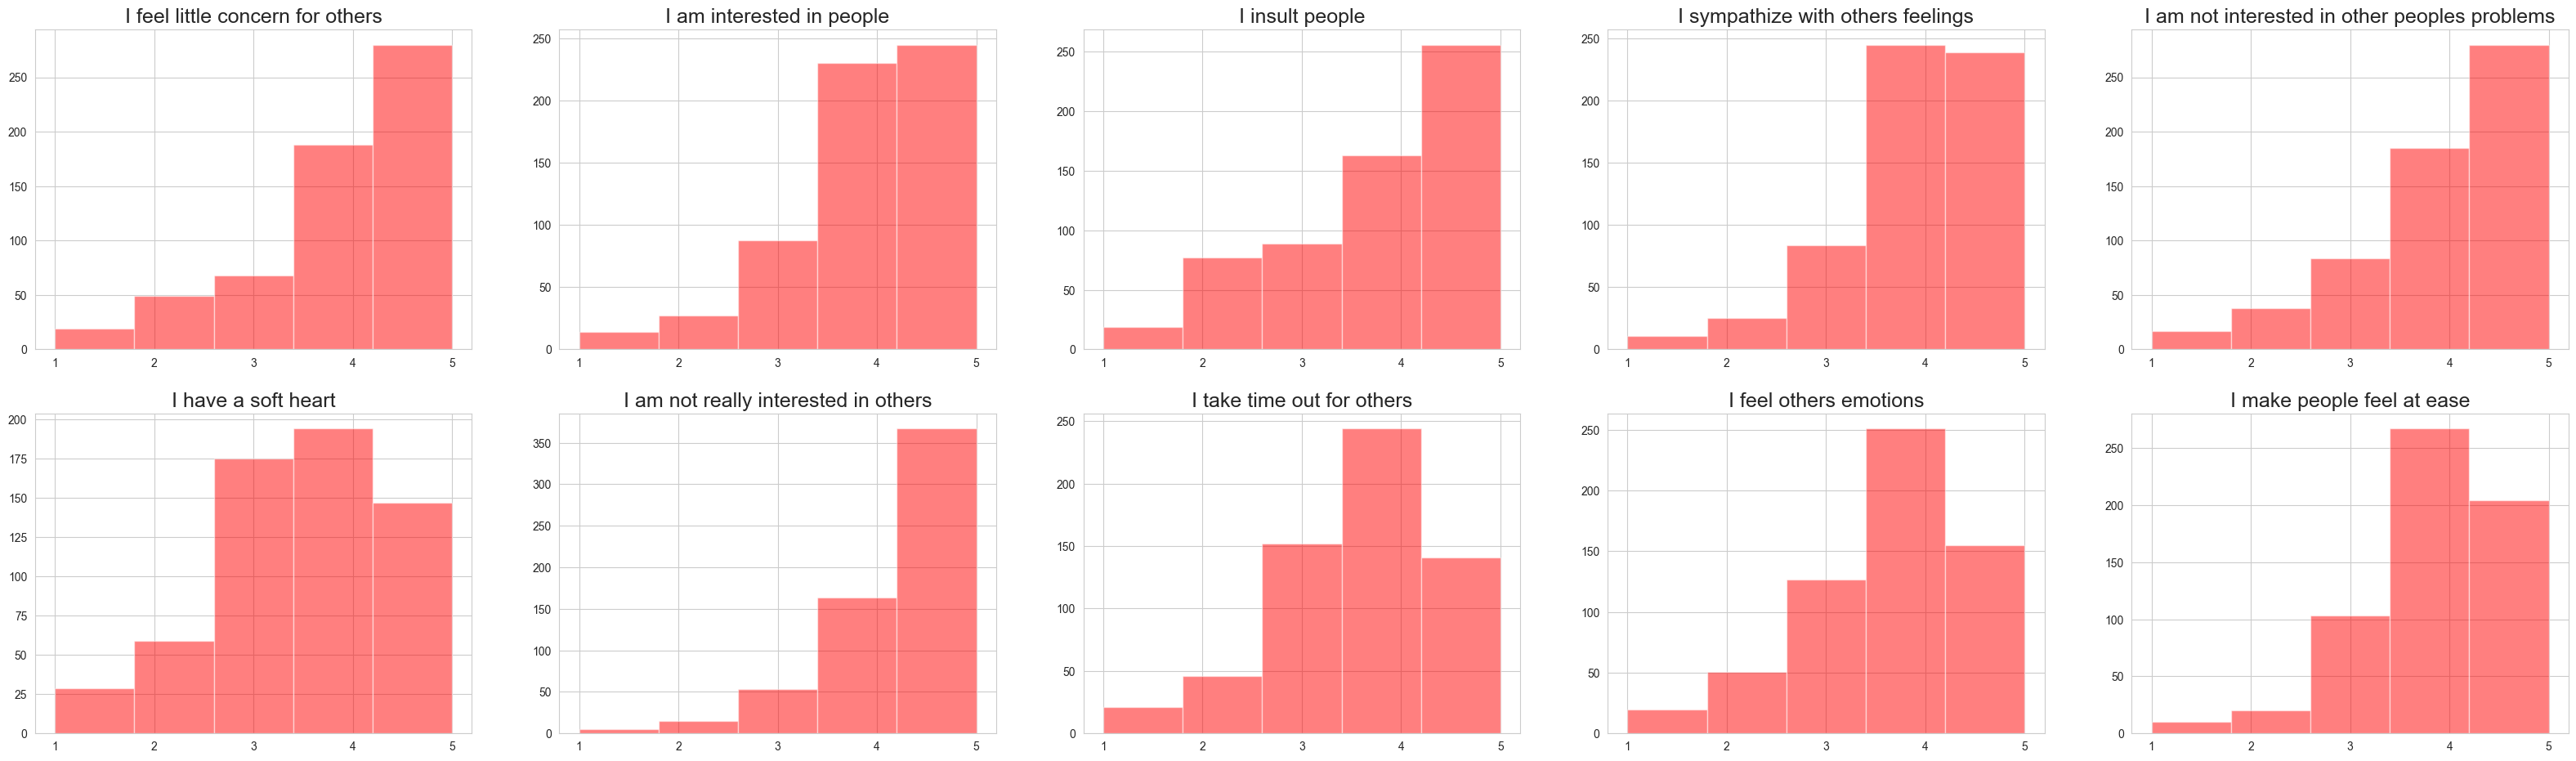

In [83]:
print('Q&As Related to Agreeableness Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientiousness Personality


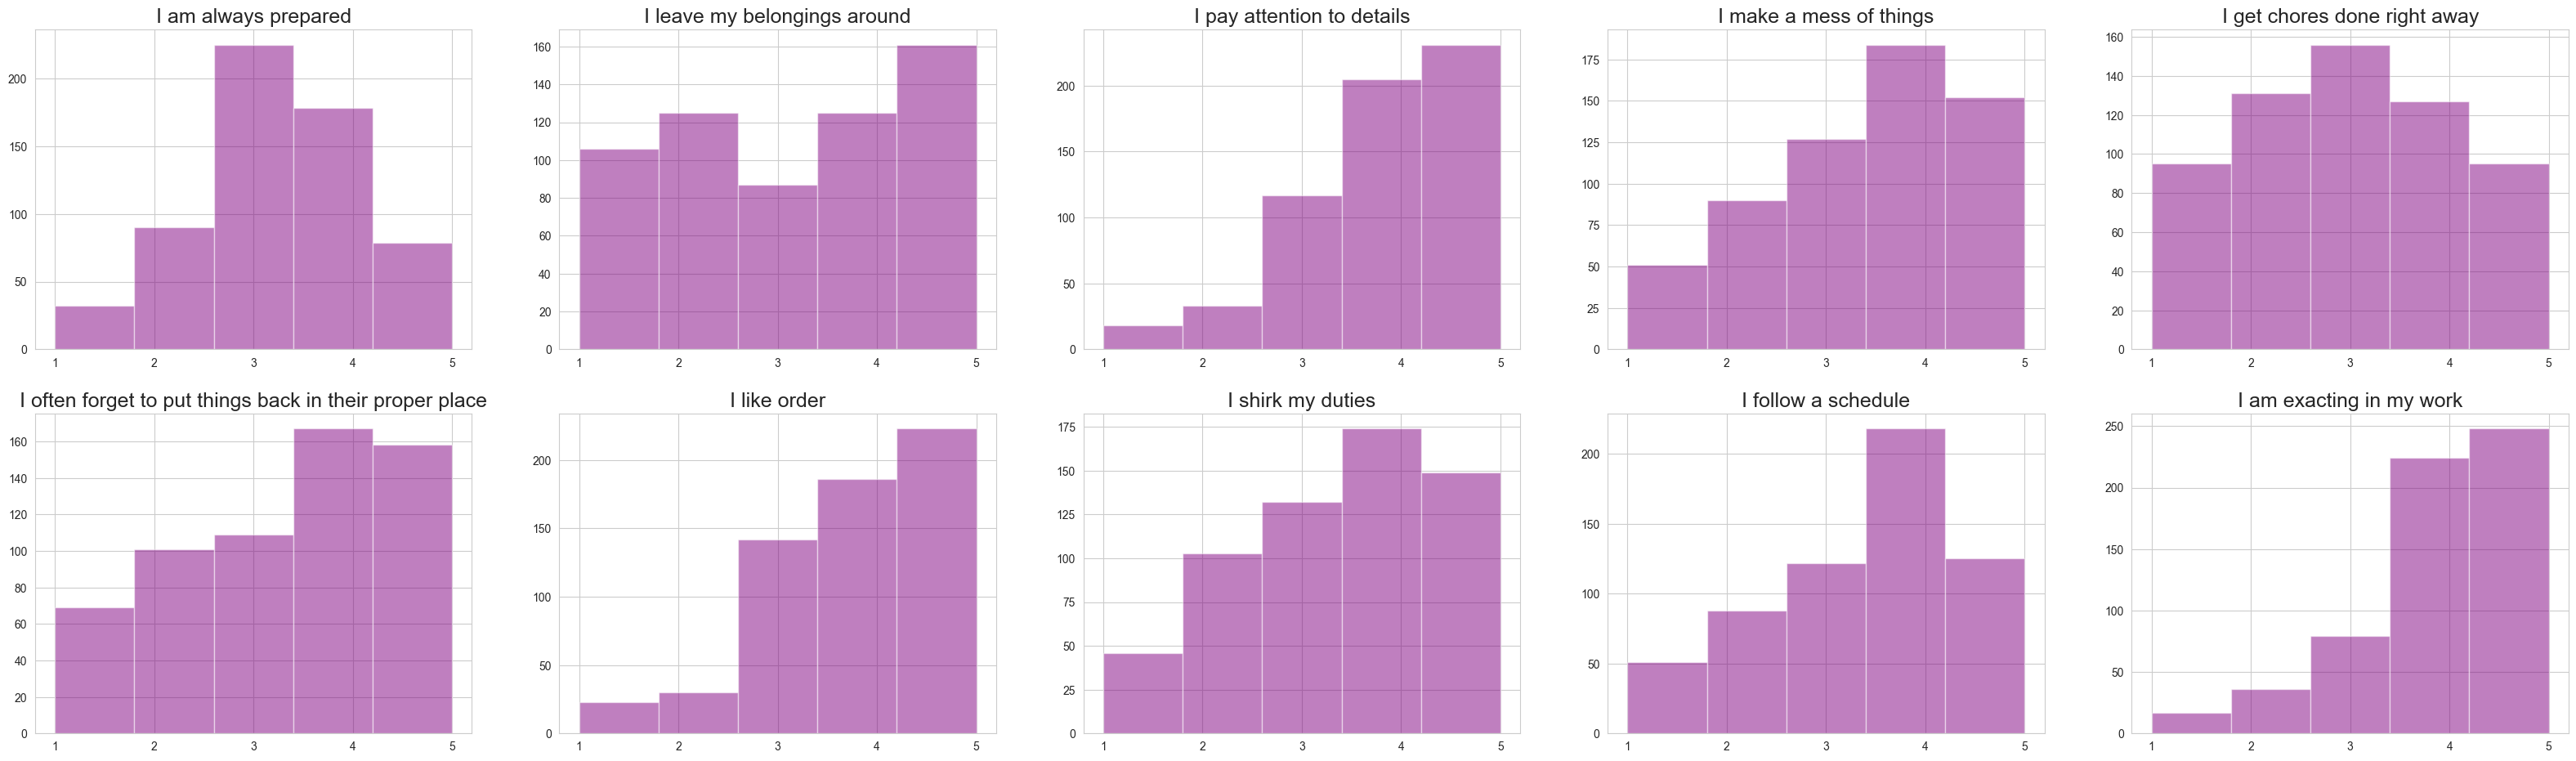

In [84]:
print('Q&As Related to Conscientiousness Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Openness Personality


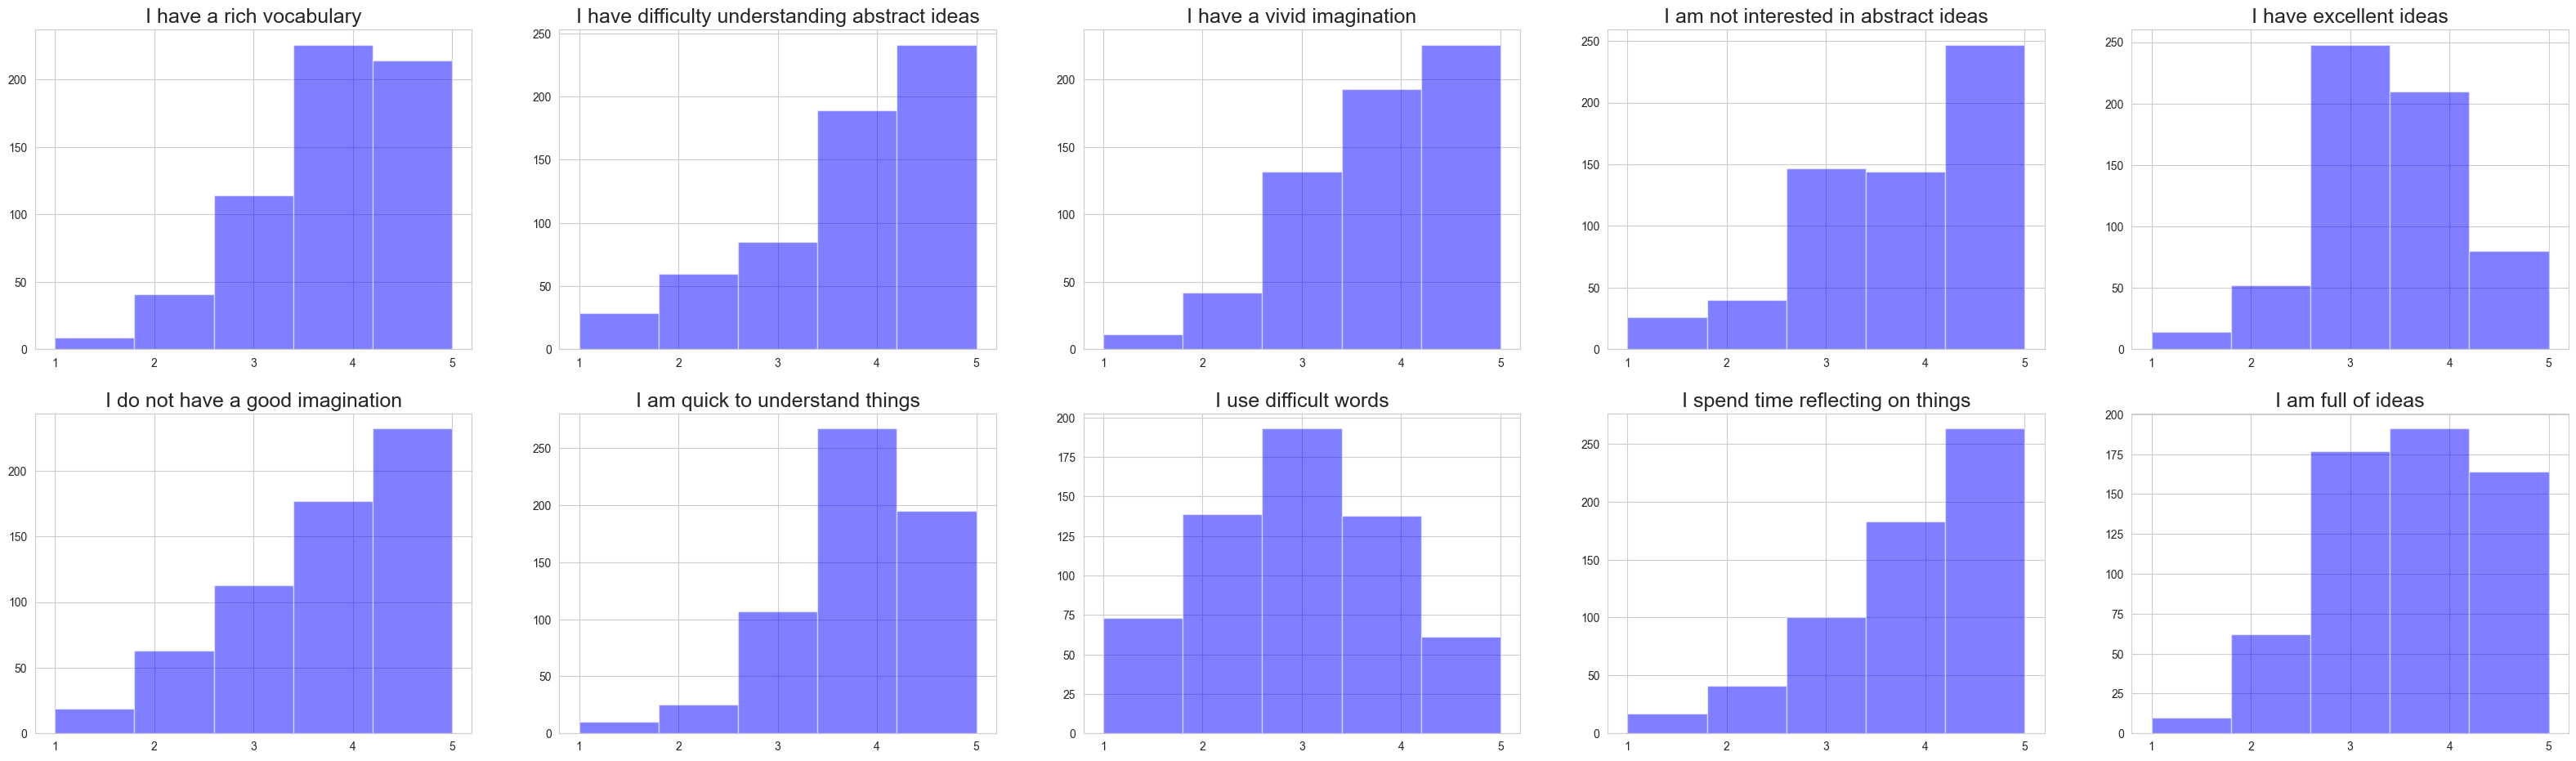

In [85]:
print('Q&As Related to Openness Personality')
vis_questions(OPN, opn_questions, 'blue')

In [11]:
# Función para obtener el signo zodiacal según la fecha de nacimiento
def get_zodiac_sign(birth_date):
    if not isinstance(birth_date, str):
        birth_date = birth_date.strftime("%Y/%m/%d")
        
    birth_date = datetime.strptime(birth_date, "%Y/%m/%d")
    day = birth_date.day
    month = birth_date.month

    if ((month == 1 and day >= 20) or (month == 2 and day <= 18)):
        return "Acuario"
    elif ((month == 2 and day >= 19) or (month == 3 and day <= 20)):
        return "Piscis"
    elif ((month == 3 and day >= 21) or (month == 4 and day <= 19)):
        return "Aries"
    elif ((month == 4 and day >= 20) or (month == 5 and day <= 20)):
        return "Tauro"
    elif ((month == 5 and day >= 21) or (month == 6 and day <= 20)):
        return "Géminis"
    elif ((month == 6 and day >= 21) or (month == 7 and day <= 22)):
        return "Cáncer"
    elif ((month == 7 and day >= 23) or (month == 8 and day <= 22)):
        return "Leo"
    elif ((month == 8 and day >= 23) or (month == 9 and day <= 22)):
        return "Virgo"
    elif ((month == 9 and day >= 23) or (month == 10 and day <= 22)):
        return "Libra"
    elif ((month == 10 and day >= 23) or (month == 11 and day <= 21)):
        return "Escorpio"
    elif ((month == 11 and day >= 22) or (month == 12 and day <= 21)):
        return "Sagitario"
    elif ((month == 12 and day >= 22) or (month == 1 and day <= 19)):
        return "Capricornio"

# Aplicamos la función a cada participante en la nueva columna 'zodiac_sign'
data['zodiac_sign'] = data['birth_date'].apply(get_zodiac_sign)

data.head()

,ext1,ext2,ext3,ext4,ext5,ext6,ext7,ext8,ext9,ext10,...,birth_location_province,birth_location_city,age,openness_score,conscientiousness_score,extraversion_score,agreeableness_score,neuroticism_score,age_group,zodiac_sign
0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,Buenos Aires,San Isidro,25,48.0,33.0,41.0,42.0,28.0,18-34,Leo
1,4.0,5.0,3.0,4.0,5.0,5.0,3.0,3.0,2.0,2.0,...,CABA,Recoleta,26,50.0,35.0,36.0,44.0,35.0,18-34,Aries
2,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,...,Barcelona,Barcelona,23,42.0,31.0,35.0,31.0,40.0,18-34,Acuario
3,2.0,3.0,4.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,...,Ciudad de Buenos Aires,Ciudad de Buenos Aires,56,36.0,31.0,30.0,42.0,36.0,55-74,Capricornio
4,3.0,2.0,2.0,3.0,5.0,5.0,5.0,2.0,1.0,1.0,...,Buenos aires,San isidro,28,43.0,33.0,29.0,41.0,20.0,18-34,Piscis


In [12]:
# Función para obtener el grupo zodiacal según el signo zodiacal
def get_zodiac_group(zodiac_sign):
    fire_signs = ['Aries', 'Leo', 'Sagitario']
    earth_signs = ['Tauro', 'Virgo', 'Capricornio']
    air_signs = ['Géminis', 'Libra', 'Acuario']
    water_signs = ['Cáncer', 'Escorpio', 'Piscis']

    if zodiac_sign in fire_signs:
        return 'Fuego'
    elif zodiac_sign in earth_signs:
        return 'Tierra'
    elif zodiac_sign in air_signs:
        return 'Aire'
    elif zodiac_sign in water_signs:
        return 'Agua'

# Aplicamos la función a cada participante en la nueva columna 'zodiac_group'
data['zodiac_group'] = data['zodiac_sign'].apply(get_zodiac_group)

data.head()

,ext1,ext2,ext3,ext4,ext5,ext6,ext7,ext8,ext9,ext10,...,birth_location_city,age,openness_score,conscientiousness_score,extraversion_score,agreeableness_score,neuroticism_score,age_group,zodiac_sign,zodiac_group
0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,San Isidro,25,48.0,33.0,41.0,42.0,28.0,18-34,Leo,Fuego
1,4.0,5.0,3.0,4.0,5.0,5.0,3.0,3.0,2.0,2.0,...,Recoleta,26,50.0,35.0,36.0,44.0,35.0,18-34,Aries,Fuego
2,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,...,Barcelona,23,42.0,31.0,35.0,31.0,40.0,18-34,Acuario,Aire
3,2.0,3.0,4.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,...,Ciudad de Buenos Aires,56,36.0,31.0,30.0,42.0,36.0,55-74,Capricornio,Tierra
4,3.0,2.0,2.0,3.0,5.0,5.0,5.0,2.0,1.0,1.0,...,San isidro,28,43.0,33.0,29.0,41.0,20.0,18-34,Piscis,Agua


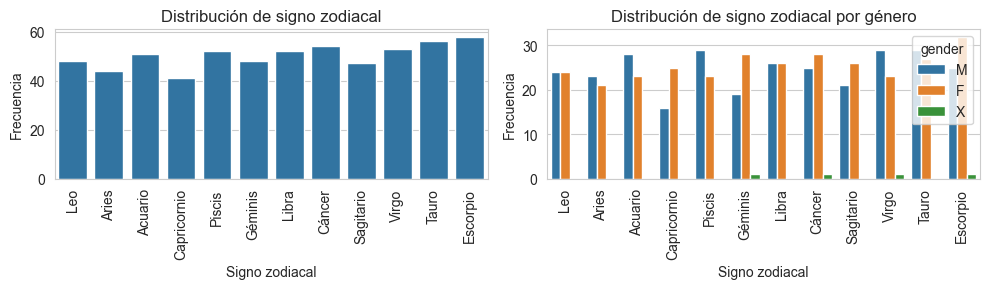

In [13]:
# Gráfico 7.1: Distribución de signo zodiacal
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='zodiac_sign')
plt.title('Distribución de signo zodiacal')
plt.xlabel('Signo zodiacal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Gráfico 7.2: Distribución de signo zodiacal por género
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='zodiac_sign', hue='gender')
plt.title('Distribución de signo zodiacal por género')
plt.xlabel('Signo zodiacal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


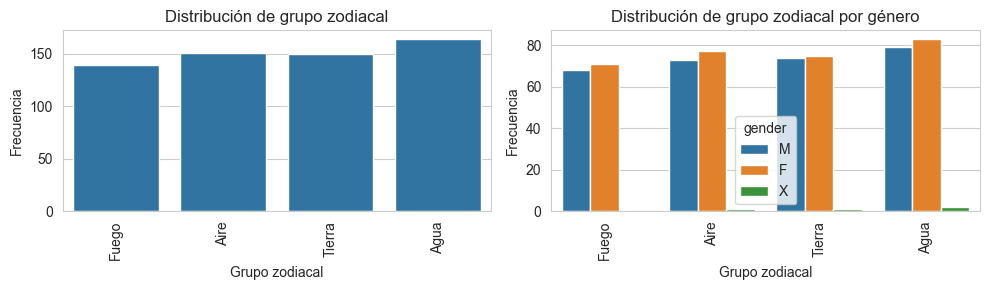

In [14]:
# Gráfico 8.1: Distribución de signo zodiacal
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='zodiac_group')
plt.title('Distribución de grupo zodiacal')
plt.xlabel('Grupo zodiacal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Gráfico 8.2: Distribución de signo zodiacal por género
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='zodiac_group', hue='gender')
plt.title('Distribución de grupo zodiacal por género')
plt.xlabel('Grupo zodiacal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Vamos a probar un simple análisis para ver si estadísticamente las mujeres tienen un score de neuroticismo más alto que el de los hombres.

In [15]:
# Separamos los dos grupos
male_neuroticism_scores = data[data['gender'] == 'M']['neuroticism_score']
female_neuroticism_scores = data[data['gender'] == 'F']['neuroticism_score']

# Hacemos un test de normalidad para ver si los datos siguen una distribución normal
male_normality = shapiro(male_neuroticism_scores)
female_normality = shapiro(female_neuroticism_scores)

print('Male normality', male_normality)
print('Female normality', female_normality)

Male normality ShapiroResult(statistic=0.9820019006729126, pvalue=0.0009359030518680811)
Female normality ShapiroResult(statistic=0.9852868914604187, pvalue=0.003208721987903118)


En ambos casos los p-values son menores a un alpha de 0.05, lo que sugiere que los scores de neuroticismo tanto para hombres como para mujeres no siguen una distribución normal. Usar un t-test, que asume normalidad, no es lo adecuado. En vez de eso vamos a usar un test no-paramétrico que no asume normalidad. El Mann-Whittney U test compara las medianas de los dos grupos independientes y es una buena alternativa al t-test cuando la data no está normalmente distribuida.

In [16]:
u_statistic, p_value = mannwhitneyu(male_neuroticism_scores, female_neuroticism_scores)

print('U statistic', u_statistic)
print('P value', p_value)

U statistic 42677.0
P value 0.27732710353568135


El p-value es mayor a un alpha de 0.05, lo que sugiere que no hay diferencia estadísticamente significativa en los scores de neuroticismo entre hombres y mujeres. No se puede concluir que las mujeres sean más neuroticas que los hombres con la data que tenemos.

Vamos ahora a comparar el grupo 'Agua' contra los 'No-agua' en la categoría de conscientitud.

In [17]:
water_data = data[data['zodiac_group'] == 'Agua']['conscientiousness_score']
non_water_data = data[data['zodiac_group'] != 'Agua']['conscientiousness_score']

print('Score promedio de Agua', water_data.mean())
print('Score promedio de No Agua', non_water_data.mean())

# Normality tests
normality_water = shapiro(water_data)
normality_non_water = shapiro(non_water_data)

print('Normalidad agua', normality_water)
print('Normalidad no agua', normality_non_water)


Score promedio de Agua 34.25609756097561
Score promedio de No Agua 35.65681818181818
Normalidad agua ShapiroResult(statistic=0.9789925217628479, pvalue=0.013542721047997475)
Normalidad no agua ShapiroResult(statistic=0.9839082360267639, pvalue=8.447805885225534e-05)


De nuevo, en ambos casos el p-value es menor a 0.05, lo cual sugiere que no siguen una distribución normal. Procedemos a realizar un Mann-Whittney U test.

In [18]:
u_statistic, p_value = mannwhitneyu(water_data, non_water_data)

print('U statistic', u_statistic)
print('P value', p_value)

U statistic 32131.0
P value 0.038273731652331396


En este caso, el p-value es menor a un alpha de 0.05, lo cual sugiere que hay una diferencia estadística significativa en la categoría de conscientitud entre los signos de agua (Cáncer, Escorpio y Piscis) y todos los demás signos. 

No es correcto asumir que esto es verdad todavía. Dado que vamos a realizar múltiples comparaciones estadísticas, existe el riesgo de obtener resultados significativos por pura casualidad. Para esto vamos ahora a realizar todos los tests posibles pero aplicando una corrección de Bonferroni, la cual va a dividir el threshold del p-value por la cantidad de tests que realizamos. Este ajuste nos ayuda a ser más rigurosos en nuestra evaluación, asegurándonos de que las diferencias que encontramos no sean simplemente producto del azar.

También vamos a apoyarnos en el método de FDR (False Discovery Rate) que es un poco más flexible. Este método ordena todos los p-values conseguidos de menor a mayor y para cada uno setea el threshold en el alpha de 0.05 multiplicado por (posición)/(cantidad de tests).

In [19]:
def compare_two_categories(data, category, group1, group2, trait):
    group1 = data[data[category] == group1][trait]
    group2 = data[data[category] == group2][trait]

    # Check para ver si hay suficientes datos
    if len(group1) < 3 or len(group2) < 3:
        return {
            'p_value': 1,
            'test_type': 'Insufficient data',
            'group1_size': len(group1),
            'group2_size': len(group2)
        }

    # Normality Test
    normality_group1 = shapiro(group1).pvalue > 0.05
    normality_group2 = shapiro(group2).pvalue > 0.05

    # Statistical Test
    if normality_group1 and normality_group2:
        test_result = ttest_ind(group1, group2)
    else:
        test_result = mannwhitneyu(group1, group2)

    return {
        'group1_mean': round(group1.mean(), 2),
        'group2_mean': round(group2.mean(), 2),
        'group1_size': len(group1),
        'group2_size': len(group2),
        'test_type': 'T-test' if normality_group1 and normality_group2 else 'Mann-Whitney U',
        'p_value': test_result.pvalue
    }

def perform_all_group_comparisons(data, category):
    traits = ['openness_score', 'conscientiousness_score', 'extraversion_score', 'agreeableness_score', 'neuroticism_score']
    degree_categories = data[category].unique()
    all_findings = []
    significant_findings = []
    all_p_values = []

    for trait in traits:
        for i in range(len(degree_categories)):
            for j in range(i, len(degree_categories)):
                if j == i:
                    continue
                result = compare_two_categories(data, category, degree_categories[i], degree_categories[j], trait)
                all_p_values.append(result['p_value'])
                all_findings.append({
                    'category_one': degree_categories[i],
                    'category_two': degree_categories[j],
                    'trait': trait,
                    'group1_mean': result['group1_mean'] if 'group1_mean' in result else None,
                    'group2_mean': result['group2_mean'] if 'group2_mean' in result else None,
                    'group1_size': result['group1_size'] if 'group1_size' in result else None,
                    'group2_size': result['group2_size'] if 'group2_size' in result else None,
                    'p_value': result['p_value'],
                    'test_type': result['test_type']
                })

    significant_findings = [result for result in all_findings if result['p_value'] < 0.05]

    # Apply Bonferroni correction
    bonferroni_adjusted = multipletests(all_p_values, method='bonferroni')[0]

    confusion_matrix_bonferroni = {
        'true_positives': sum(bonferroni_adjusted),
        'false_positives': len(significant_findings) - sum(bonferroni_adjusted),
        'true_negatives': len(all_p_values) - len(significant_findings),
        'false_negatives': 0 # Bonferroni correction does not produce false negatives in this context
    }

    # Apply FDR correction
    fdr_adjusted = multipletests(all_p_values, method='fdr_bh')[0]

    confusion_matrix_fdr = {
        'true_positives': sum(fdr_adjusted),
        'false_positives': len(significant_findings) - sum(fdr_adjusted),
        'true_negatives': len(all_p_values) - len(significant_findings),
        'false_negatives': 0 # FDR correction does not produce false negatives in this context
    }

    return {
        'tests_conducted': len(all_findings),
        'significant_findings': significant_findings,
        'bonferroni_findings': [sig for sig, adj in zip(all_findings, bonferroni_adjusted) if adj],
        'confusion_matrix_bonferroni': confusion_matrix_bonferroni,
        'fdr_findings': [sig for sig, adj in zip(all_findings, fdr_adjusted) if adj],
        'confusion_matrix_fdr': confusion_matrix_fdr
    }

In [20]:
def perform_analysis(data, category):
    results = perform_all_group_comparisons(data, category)

    print(f'Categoría analizada: {category}')
    print('---------------------------------')
    print(f'# Tests: ' + str(results['tests_conducted']))
    print(f'Descubrimientos significativos (p-value < 0.05): ' + str(len(results['significant_findings'])))
    print('---------------------------------')
    print(f'Descubrimientos significativos por el método Bonferroni: ' + str(len(results['bonferroni_findings'])))
    print(f'Matríz de confusión (Bonferroni): ', results['confusion_matrix_bonferroni'])
    print('---------------------------------')
    print(f'Descubrimientos significativos por el método de False Discovery Rate: ' + str(len(results['fdr_findings'])))
    print(f'Matríz de confusión (FDR): ', results['confusion_matrix_fdr'])

    if len(results['bonferroni_findings']) > 0:
        print('---------------------------------')
        print('Descubrimientos significativos por el método Bonferroni:')
        for finding in results['bonferroni_findings']:
            higher_group = finding['category_one'] if finding['group1_mean'] > finding['group2_mean'] else finding['category_two']
            lower_group = finding['category_two'] if finding['group1_mean'] > finding['group2_mean'] else finding['category_one']
            print('---------------------------------')
            print(f"Rasgo: {finding['trait']}")
            print(f"{finding['category_one']} vs {finding['category_two']}")
            print(f"Media {finding['category_one']}: {finding['group1_mean']:.2f}")
            print(f"Media {finding['category_two']}: {finding['group2_mean']:.2f}")
            print(f"p-value: {finding['p_value']}")
            print(f"Interpretación: {higher_group} tiene un {finding['trait']} significativamente más alto que {lower_group}.")
    

    if len(results['fdr_findings']) > 0:
        print('---------------------------------')
        print('Descubrimientos significativos por el método de False Discovery Rate:')
        for finding in results['fdr_findings']:
            higher_group = finding['category_one'] if finding['group1_mean'] > finding['group2_mean'] else finding['category_two']
            lower_group = finding['category_two'] if finding['group1_mean'] > finding['group2_mean'] else finding['category_one']
            print('---------------------------------')
            print(f"Rasgo: {finding['trait']}")
            print(f"{finding['category_one']} vs {finding['category_two']}")
            print(f"Media {finding['category_one']}: {finding['group1_mean']:.2f}")
            print(f"Media {finding['category_two']}: {finding['group2_mean']:.2f}")
            print(f"p-value: {finding['p_value']}")
            print(f"Interpretación: {higher_group} tiene un {finding['trait']} significativamente más alto que {lower_group}.")

In [21]:
perform_analysis(data, "zodiac_sign")


Categoría analizada: zodiac_sign
---------------------------------
# Tests: 330
Descubrimientos significativos (p-value < 0.05): 15
---------------------------------
Descubrimientos significativos por el método Bonferroni: 0
Matríz de confusión (Bonferroni):  {'true_positives': 0, 'false_positives': 15, 'true_negatives': 315, 'false_negatives': 0}
---------------------------------
Descubrimientos significativos por el método de False Discovery Rate: 0
Matríz de confusión (FDR):  {'true_positives': 0, 'false_positives': 15, 'true_negatives': 315, 'false_negatives': 0}


In [22]:
perform_analysis(data, "zodiac_group")


Categoría analizada: zodiac_group
---------------------------------
# Tests: 30
Descubrimientos significativos (p-value < 0.05): 2
---------------------------------
Descubrimientos significativos por el método Bonferroni: 0
Matríz de confusión (Bonferroni):  {'true_positives': 0, 'false_positives': 2, 'true_negatives': 28, 'false_negatives': 0}
---------------------------------
Descubrimientos significativos por el método de False Discovery Rate: 0
Matríz de confusión (FDR):  {'true_positives': 0, 'false_positives': 2, 'true_negatives': 28, 'false_negatives': 0}


In [23]:
perform_analysis(data, "degree_category")


Categoría analizada: degree_category
---------------------------------
# Tests: 180
Descubrimientos significativos (p-value < 0.05): 21
---------------------------------
Descubrimientos significativos por el método Bonferroni: 0
Matríz de confusión (Bonferroni):  {'true_positives': 0, 'false_positives': 21, 'true_negatives': 159, 'false_negatives': 0}
---------------------------------
Descubrimientos significativos por el método de False Discovery Rate: 0
Matríz de confusión (FDR):  {'true_positives': 0, 'false_positives': 21, 'true_negatives': 159, 'false_negatives': 0}


In [24]:
perform_analysis(data, "birth_location_country_clean")


Categoría analizada: birth_location_country_clean
---------------------------------
# Tests: 1050
Descubrimientos significativos (p-value < 0.05): 26
---------------------------------
Descubrimientos significativos por el método Bonferroni: 0
Matríz de confusión (Bonferroni):  {'true_positives': 0, 'false_positives': 26, 'true_negatives': 1024, 'false_negatives': 0}
---------------------------------
Descubrimientos significativos por el método de False Discovery Rate: 0
Matríz de confusión (FDR):  {'true_positives': 0, 'false_positives': 26, 'true_negatives': 1024, 'false_negatives': 0}


In [25]:
perform_analysis(data, "gender")


Categoría analizada: gender
---------------------------------
# Tests: 15
Descubrimientos significativos (p-value < 0.05): 4
---------------------------------
Descubrimientos significativos por el método Bonferroni: 2
Matríz de confusión (Bonferroni):  {'true_positives': 2, 'false_positives': 2, 'true_negatives': 11, 'false_negatives': 0}
---------------------------------
Descubrimientos significativos por el método de False Discovery Rate: 3
Matríz de confusión (FDR):  {'true_positives': 3, 'false_positives': 1, 'true_negatives': 11, 'false_negatives': 0}
---------------------------------
Descubrimientos significativos por el método Bonferroni:
---------------------------------
Rasgo: conscientiousness_score
M vs F
Media M: 33.80
Media F: 36.73
p-value: 3.496796249269053e-06
Interpretación: F tiene un conscientiousness_score significativamente más alto que M.
---------------------------------
Rasgo: agreeableness_score
M vs F
Media M: 38.00
Media F: 41.89
p-value: 2.3849219280712997e-

In [26]:
perform_analysis(data, "age_group")

Categoría analizada: age_group
---------------------------------
# Tests: 50
Descubrimientos significativos (p-value < 0.05): 14
---------------------------------
Descubrimientos significativos por el método Bonferroni: 4
Matríz de confusión (Bonferroni):  {'true_positives': 4, 'false_positives': 10, 'true_negatives': 36, 'false_negatives': 0}
---------------------------------
Descubrimientos significativos por el método de False Discovery Rate: 6
Matríz de confusión (FDR):  {'true_positives': 6, 'false_positives': 8, 'true_negatives': 36, 'false_negatives': 0}
---------------------------------
Descubrimientos significativos por el método Bonferroni:
---------------------------------
Rasgo: conscientiousness_score
18-34 vs 55-74
Media 18-34: 33.91
Media 55-74: 39.91
p-value: 1.3798934061310458e-10
Interpretación: 55-74 tiene un conscientiousness_score significativamente más alto que 18-34.
---------------------------------
Rasgo: conscientiousness_score
55-74 vs 35-54
Media 55-74: 39.9

In [27]:
perform_analysis(data, "happiness_level")


Categoría analizada: happiness_level
---------------------------------
# Tests: 50
Descubrimientos significativos (p-value < 0.05): 27
---------------------------------
Descubrimientos significativos por el método Bonferroni: 16
Matríz de confusión (Bonferroni):  {'true_positives': 16, 'false_positives': 11, 'true_negatives': 23, 'false_negatives': 0}
---------------------------------
Descubrimientos significativos por el método de False Discovery Rate: 23
Matríz de confusión (FDR):  {'true_positives': 23, 'false_positives': 4, 'true_negatives': 23, 'false_negatives': 0}
---------------------------------
Descubrimientos significativos por el método Bonferroni:
---------------------------------
Rasgo: conscientiousness_score
4 vs 2
Media 4: 36.19
Media 2: 31.32
p-value: 6.372767117275226e-05
Interpretación: 4 tiene un conscientiousness_score significativamente más alto que 2.
---------------------------------
Rasgo: conscientiousness_score
3 vs 5
Media 3: 34.66
Media 5: 37.86
p-value: 0

In [97]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

# make df dataframe of first 50 columns
df = data.iloc[:, 0:50]
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df.sample(n=500, random_state=1)

/Users/fermin/Desktop/TESIS/analisis_datos/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fermin/Desktop/TESIS/analisis_datos/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fermin/Desktop/TESIS/analisis_datos/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fermin/Desktop/TESIS/analisis_datos/env/lib/python3.11/site-packages/

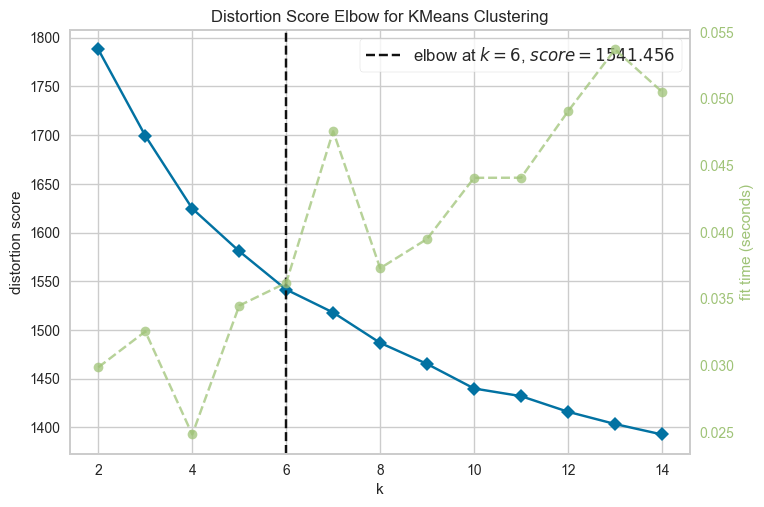

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [122]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = data.iloc[:, 0:50]

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

/Users/fermin/Desktop/TESIS/analisis_datos/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [123]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,ext1,ext2,ext3,ext4,ext5,...,opn7,opn8,opn9,opn10,Clusters
0,4.0,5.0,4.0,4.0,4.0,...,4.0,5.0,5.0,5.0,2
1,4.0,5.0,3.0,4.0,5.0,...,5.0,5.0,5.0,5.0,1
2,4.0,3.0,4.0,4.0,4.0,...,5.0,5.0,4.0,3.0,1
3,2.0,3.0,4.0,3.0,3.0,...,4.0,3.0,4.0,4.0,1
4,3.0,2.0,2.0,3.0,5.0,...,4.0,2.0,5.0,5.0,0


In [124]:
df_model.Clusters.value_counts()

Clusters
2    164
0    146
3    102
1     96
4     96
Name: count, dtype: int64

In [125]:
df_model.groupby('Clusters').mean()

,ext1,ext2,ext3,ext4,ext5,...,opn6,opn7,opn8,opn9,opn10
Clusters,,,,,,,,,,,
0,2.321918,2.719178,2.993151,2.513699,2.979452,...,3.773973,4.075342,2.684932,3.726027,3.287671
1,3.145833,4.031250,3.687500,3.427083,4.041667,...,4.083333,4.031250,3.458333,4.552083,4.166667
2,3.493902,4.103659,4.158537,3.548780,4.243902,...,4.298780,4.317073,3.036585,3.969512,4.030488
3,2.990196,3.294118,2.990196,2.794118,3.460784,...,3.823529,4.019608,2.950980,4.343137,4.000000
4,2.114583,2.614583,2.645833,2.354167,2.552083,...,3.270833,3.375000,2.750000,3.864583,3.125000


In [126]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.601370,2.407534,4.100685,3.798630,3.628767
1,3.577083,3.585417,4.203125,2.897917,4.013542
2,3.847561,2.225610,4.235976,3.693293,4.035976
3,3.022549,3.585294,3.957843,4.185294,3.873529
4,2.362500,3.654167,3.266667,2.763542,3.293750


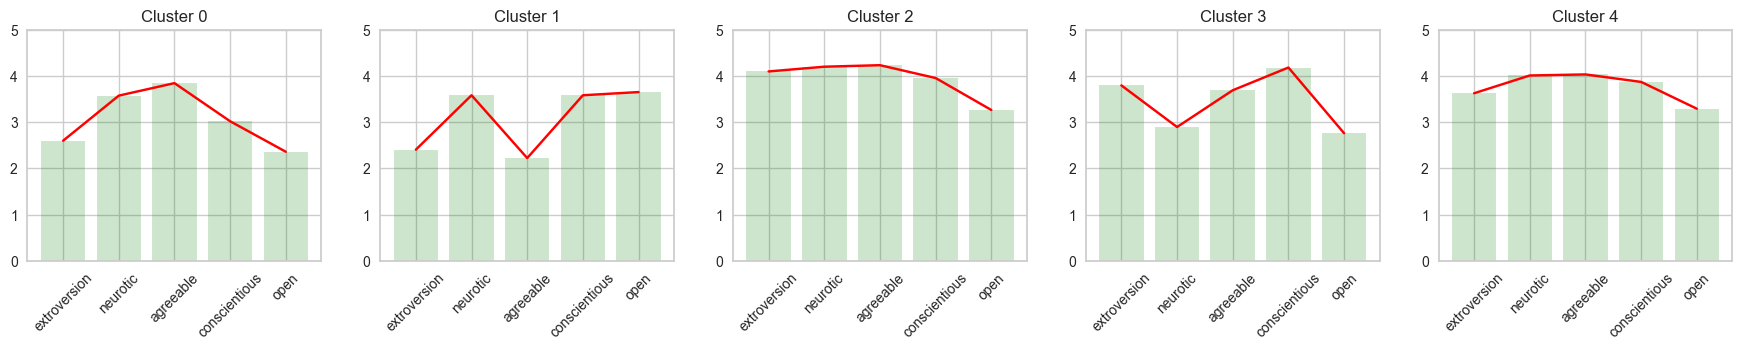

In [127]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,5);

In [128]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-1.906504,3.633137,2
1,-0.645889,4.275642,1
2,2.833390,2.825382,1
3,1.731866,0.957932,1
4,-2.364157,0.121958,0


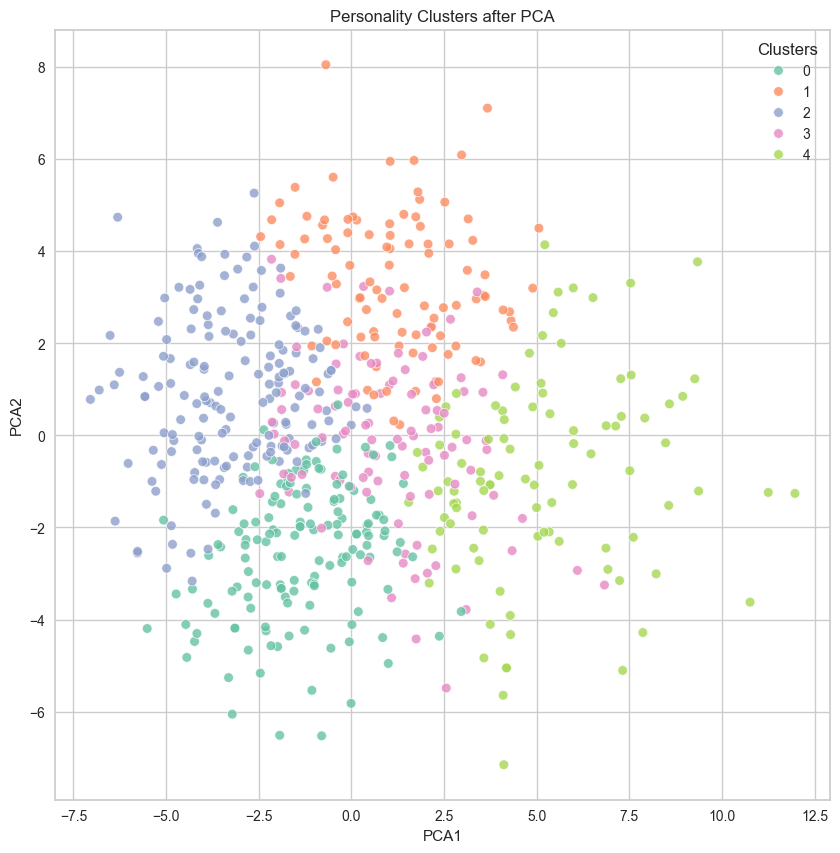

In [129]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');